## Python Libraries - Pandas - Grouping and Pivoting

### Grouping

Grouping and aggregation are some of the most frequently used operations in data analysis, especially while performing exploratory data analysis (EDA), where comparing summary statistics across groups of data is common.

Grouping analysis can be thought of as having three parts, namely:
-  Splitting the data into groups (e.g., groups of customer segments, product categories, etc.)
-  Applying a function to each group (e.g., the mean or total sales of each customer segment)
-  Combining the results into a data structure showing summary statistics


In [1]:
# Loading libraries and file - sales.xlsx - with Market and Region as index
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#sales
sales = pd.read_excel("sales.xlsx",index_col=[0,1])

In [2]:
# Checking the 'sales' dataframe 
sales.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 23 entries, ('Africa', 'Western Africa') to ('USCA', 'Canada')
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   No_of_Orders  23 non-null     int64  
 1   Profit        23 non-null     float64
 2   Sales         23 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.6+ KB


In [3]:
# Grouping the sales dataframe for the sum of the column 'No_of_Orders'
sales[["No_of_Orders"]].groupby("Market").sum()


,No_of_Orders
Market,
Africa,731
Asia Pacific,2481
Europe,1910
LATAM,1714
USCA,1593


In [4]:
# Grouping the sales dataframe over the index 'Market' for the sum of the columns 'No_of_Orders' and 'Sales'
sales[["No_of_Orders","Sales"]].groupby("Market").sum()

,No_of_Orders,Sales
Market,,
Africa,731,322367.04
Asia Pacific,2481,1537454.71
Europe,1910,1233569.09
LATAM,1714,788713.82
USCA,1593,862452.84


In [5]:
# Grouping the sales dataframe over the index 'Market' for the maximum value in the column 'No_of_Orders'
sales[["No_of_Orders"]].groupby("Market").max()

,No_of_Orders
Market,
Africa,251
Asia Pacific,646
Europe,964
LATAM,930
USCA,490


In [6]:
# Creating a dataframe 'df' with the mean of column 'Profit' for each market
df=sales[["Profit"]].groupby("Market").mean()
df

,Profit
Market,
Africa,8825.898000
Asia Pacific,32845.010000
Europe,42322.722500
LATAM,33528.906667
USCA,30540.314000


In [7]:
nf=sales[["No_of_Orders"]]
nf

No_of_Orders
Market       Region                         
Africa       Western Africa              251
             Southern Africa              85
             North Africa                182
             Eastern Africa              110
             Central Africa              103
Asia Pacific Western Asia                382
             Southern Asia               469
             Southeastern Asia           533
             Oceania                     646
             Eastern Asia                414
             Central Asia                 37
Europe       Western Europe              964
             Southern Europe             338
             Northern Europe             367
             Eastern Europe              241
LATAM        South America               496
             Central America             930
             Caribbean                   288
USCA         Western US                  490
             Southern US                 255
             Eastern US                  443
             Central US                  356
             Canada                       49

### Pivoting

You may want to use pandas pivot tables as an alternative to ```groupby()```. They provide Excel-like functionalities to create aggregate tables. 

In [8]:
# Read the help documentation for pivot_table
help(pd.DataFrame.pivot_table)

Help on function pivot_table in module pandas.core.frame:

pivot_table(self, values=None, index=None, columns=None, aggfunc: 'AggFuncType' = 'mean', fill_value=None, margins: 'bool' = False, dropna: 'bool' = True, margins_name: 'Level' = 'All', observed: 'bool' = False, sort: 'bool' = True) -> 'DataFrame'
    Create a spreadsheet-style pivot table as a DataFrame.
    
    The levels in the pivot table will be stored in MultiIndex objects
    (hierarchical indexes) on the index and columns of the result DataFrame.
    
    Parameters
    ----------
    values : list-like or scalar, optional
        Column or columns to aggregate.
    index : column, Grouper, array, or list of the previous
        If an array is passed, it must be the same length as the data. The
        list can contain any of the other types (except list).
        Keys to group by on the pivot table index.  If an array is passed,
        it is being used as the same manner as column values.
    columns : column, Groupe

In [9]:
# Create a new dataframe
users= pd.DataFrame({"weekday" : ['Sun', 'Sun', 'Mon', 'Mon'],
                    "city": ['Austin', 'Dallas', 'Austin', 'Dallas'],
                    "visitors":[139, 237, 326, 456],
                    "signups" : [7, 12, 3, 5]})

In [10]:
# Set the index of the dataframe as 'weekday'
users.set_index("weekday",inplace=True)
users

,city,visitors,signups
weekday,,,
Sun,Austin,139,7
Sun,Dallas,237,12
Mon,Austin,326,3
Mon,Dallas,456,5


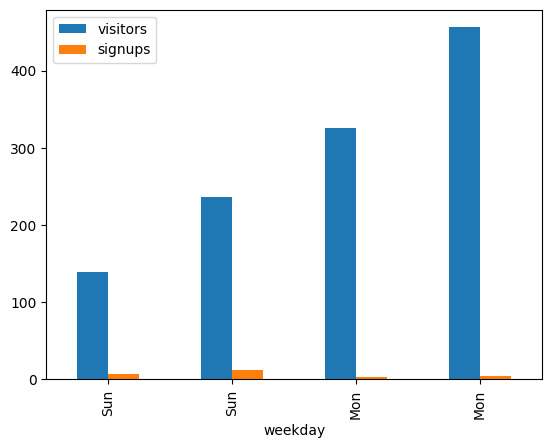

In [11]:
# plot a bar graph over the dataframe 'users'
users.plot(kind="bar")
plt.show()

In [12]:
# Create a pivot table with the columns as 'city' summarising the variable 'visitors'
visitors_pivot=users.pivot(columns="city",values="visitors")


In [13]:
# Check the created pivot table
visitors_pivot

city,Austin,Dallas
weekday,,
Mon,326,456
Sun,139,237


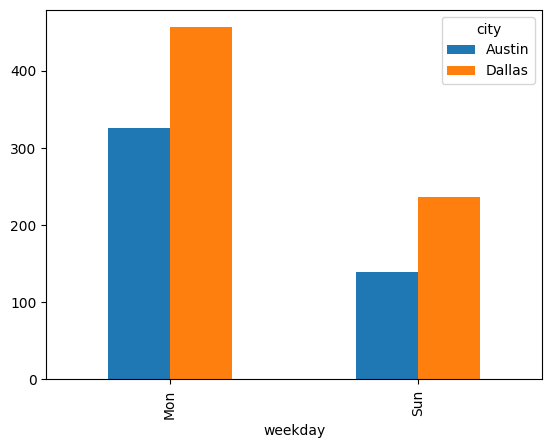

In [14]:
# Draw a bar graph over the created pivot
visitors_pivot.plot(kind="bar")
plt.show()

In [15]:
# Create a pivot table with the columns as 'city' summarising all the variables
visitors_signup=users.pivot(columns="city")

In [16]:
# Check the created pivot table
visitors_signup

visitors        signups       
city      Austin Dallas  Austin Dallas
weekday                               
Mon          326    456       3      5
Sun          139    237       7     12

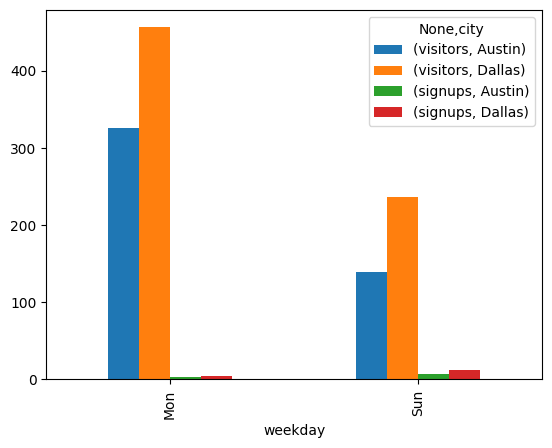

In [17]:
# Draw a bar graph over the created pivot for each variable
visitors_signup.plot(kind="bar")
plt.show()

In [18]:
df = pd.read_csv('https://query.data.world/s/vBDCsoHCytUSLKkLvq851k2b8JOCkF')
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB
